# NBA Player Data — Exploratory Data Analysis
Ce notebook charge **player_gamelog_2023‑24.parquet** et **player_phys_2023‑24.parquet**, puis explore visuellement toutes les variables pour guider la sélection des features.

In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path

BASE = Path('nba_rating/data')
gamelog = pd.read_parquet(BASE/'raw/player_gamelog_2023-24.parquet')
phys    = pd.read_parquet(BASE/'raw/player_phys_2023-24.parquet')
print('gamelog:', gamelog.shape, 'phys:', phys.shape)

gamelog: (26401, 32) phys: (532, 19)


In [11]:
df = (gamelog
        .groupby('PLAYER_ID')
        .agg(pts_mean=('PTS','mean'),
             reb_mean=('REB','mean'),
             ast_mean=('AST','mean'),
             pm_mean=('PLUS_MINUS','mean'),
             gp=('GAME_ID','nunique'),
             min_mean=('MIN','mean'),
             fg_pct=('FG_PCT','mean'),
             fg3_pct=('FG3_PCT','mean'),
             ft_pct=('FT_PCT','mean'))
        .merge(phys, on='PLAYER_ID', how='left'))

# convert phys columns
if 'HEIGHT_CM' in df.columns: df['height_cm'] = df['HEIGHT_CM']
if 'BMI' in df.columns: df['bmi'] = df['BMI']
if 'AGE' in df.columns: df['age'] = df['AGE']

df.head()

,PLAYER_ID,pts_mean,reb_mean,ast_mean,pm_mean,gp,min_mean,fg_pct,fg3_pct,ft_pct,...,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,HOW_ACQUIRED,height_cm,weight_kg,bmi,age
0,2544,25.661972,7.295775,8.295775,3.112676,71,35.323944,0.542239,0.404592,0.741300,...,250,"DEC 30, 1984",39.0,20,St. Vincent-St. Mary HS (OH),Signed on 07/09/18,205.74,113.378685,26.785141,39.0
1,101108,9.189655,3.879310,6.775862,1.896552,58,26.431034,0.425069,0.337789,0.751200,...,175,"MAY 06, 1985",39.0,18,Wake Forest,None,182.88,79.365079,23.729961,39.0
2,200768,8.116667,3.233333,4.216667,0.033333,60,28.183333,0.409717,0.387407,0.818464,...,196,"MAR 25, 1986",38.0,17,Villanova,Signed on 02/13/24,182.88,88.888889,26.577557,38.0
3,200782,1.677419,2.741935,0.516129,-0.741935,31,15.709677,0.278773,0.375050,1.000000,...,245,"MAY 05, 1985",39.0,12,Texas,None,195.58,111.111111,29.047490,39.0
4,201142,27.093333,6.600000,5.040000,3.866667,75,37.200000,0.530987,0.422333,0.859871,...,240,"SEP 29, 1988",35.0,15,Texas,Traded from BKN on 02/09/23,210.82,108.843537,24.489450,35.0


In [18]:
df.describe()

,PLAYER_ID,pts_mean,reb_mean,ast_mean,pm_mean,gp,min_mean,fg_pct,fg3_pct,ft_pct,TeamID,AGE,height_cm,weight_kg,bmi,age
count,5.720000e+02,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,568.000000,540.000000,537.000000,5.220000e+02,522.000000,522.000000,522.000000,522.000000,522.000000
mean,1.378544e+06,8.422111,3.374584,2.001271,-0.434201,46.155594,18.651273,0.440797,0.301345,0.742288,1.610613e+09,26.157088,199.409464,97.729820,24.542152,26.157088
std,5.463796e+05,6.790235,2.427009,1.875682,3.242988,25.536868,9.915772,0.118677,0.137102,0.160321,8.695121e+00,4.316001,7.948864,10.792467,1.898348,4.316001
min,2.544000e+03,0.000000,0.000000,0.000000,-13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,19.000000,172.720000,72.562358,18.672089,19.000000
25%,1.627848e+06,3.396154,1.589367,0.714286,-2.371904,22.000000,10.725142,0.389246,0.251915,0.676939,1.610613e+09,23.000000,193.040000,90.702948,23.213222,23.000000
50%,1.629724e+06,6.422532,2.977602,1.307099,-0.380793,51.000000,17.292111,0.442245,0.327403,0.765051,1.610613e+09,25.000000,198.120000,97.505669,24.505468,25.000000
75%,1.630702e+06,11.664118,4.394159,2.743038,1.485759,69.000000,27.058515,0.498535,0.375074,0.833833,1.610613e+09,28.750000,205.740000,104.308390,25.713736,28.750000
max,1.642013e+06,34.692308,13.658537,10.898551,8.632911,84.000000,37.911392,0.758286,1.000000,1.000000,1.610613e+09,39.000000,223.520000,131.519274,32.813542,39.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PLAYER_ID     572 non-null    int64  
 1   pts_mean      572 non-null    float64
 2   reb_mean      572 non-null    float64
 3   ast_mean      572 non-null    float64
 4   pm_mean       572 non-null    float64
 5   gp            572 non-null    int64  
 6   min_mean      572 non-null    float64
 7   fg_pct        568 non-null    float64
 8   fg3_pct       540 non-null    float64
 9   ft_pct        537 non-null    float64
 10  TeamID        522 non-null    float64
 11  SEASON        522 non-null    object 
 12  LeagueID      522 non-null    object 
 13  PLAYER        522 non-null    object 
 14  NICKNAME      522 non-null    object 
 15  PLAYER_SLUG   522 non-null    object 
 16  NUM           520 non-null    object 
 17  POSITION      522 non-null    object 
 18  HEIGHT        522 non-null    

## Pourcentage de valeurs manquantes

In [12]:
df.isna().mean().mul(100).sort_values(ascending=False).to_frame('pct_nan').head(30)

,pct_nan
HOW_ACQUIRED,52.097902
NUM,9.090909
NICKNAME,8.741259
PLAYER_SLUG,8.741259
bmi,8.741259
weight_kg,8.741259
height_cm,8.741259
SCHOOL,8.741259
EXP,8.741259
AGE,8.741259


## Statistiques descriptives

In [13]:
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
PLAYER_ID,572.0,1.378544e+06,546379.645029,2.544000e+03,1.627848e+06,1.629724e+06,1.630702e+06,1.642013e+06
pts_mean,572.0,8.422111e+00,6.790235,0.000000e+00,3.396154e+00,6.422532e+00,1.166412e+01,3.469231e+01
reb_mean,572.0,3.374584e+00,2.427009,0.000000e+00,1.589367e+00,2.977602e+00,4.394159e+00,1.365854e+01
ast_mean,572.0,2.001271e+00,1.875682,0.000000e+00,7.142857e-01,1.307099e+00,2.743038e+00,1.089855e+01
pm_mean,572.0,-4.342014e-01,3.242988,-1.300000e+01,-2.371904e+00,-3.807932e-01,1.485759e+00,8.632911e+00
gp,572.0,4.615559e+01,25.536868,1.000000e+00,2.200000e+01,5.100000e+01,6.900000e+01,8.400000e+01
min_mean,572.0,1.865127e+01,9.915772,0.000000e+00,1.072514e+01,1.729211e+01,2.705851e+01,3.791139e+01
fg_pct,568.0,4.407967e-01,0.118677,0.000000e+00,3.892461e-01,4.422454e-01,4.985350e-01,7.582857e-01
fg3_pct,540.0,3.013451e-01,0.137102,0.000000e+00,2.519152e-01,3.274026e-01,3.750737e-01,1.000000e+00
ft_pct,537.0,7.422880e-01,0.160321,0.000000e+00,6.769394e-01,7.650513e-01,8.338333e-01,1.000000e+00


## Distributions univariées

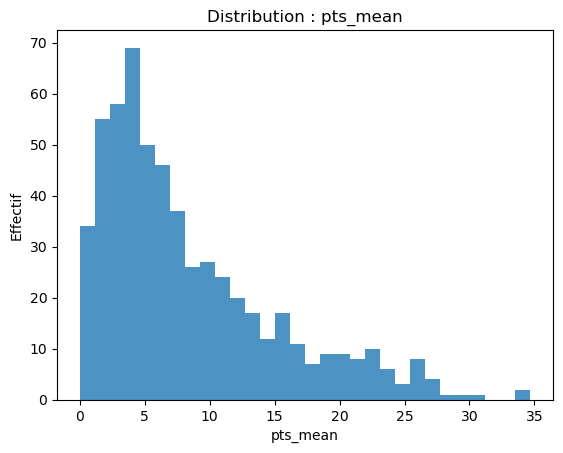

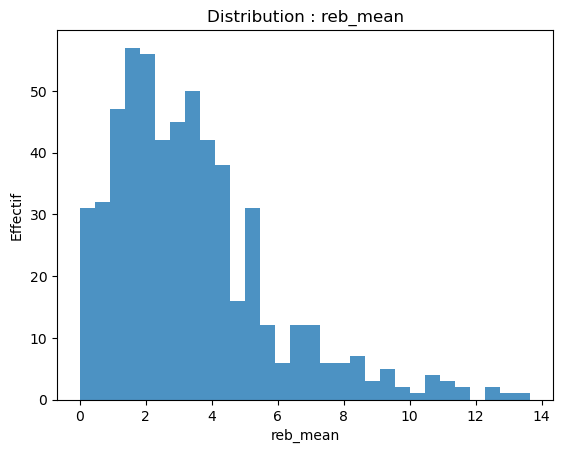

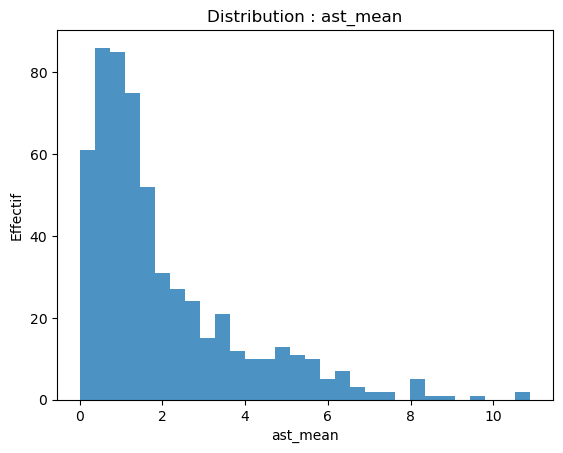

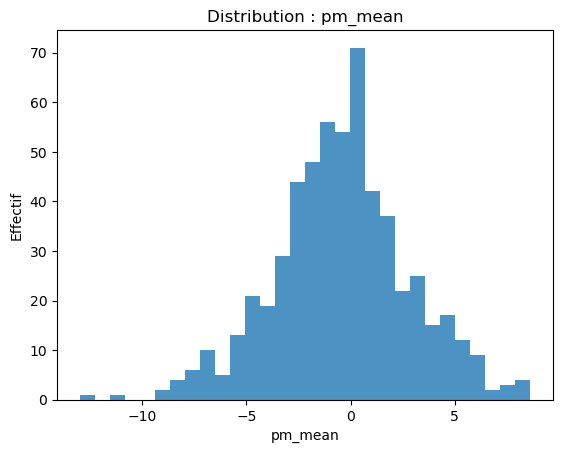

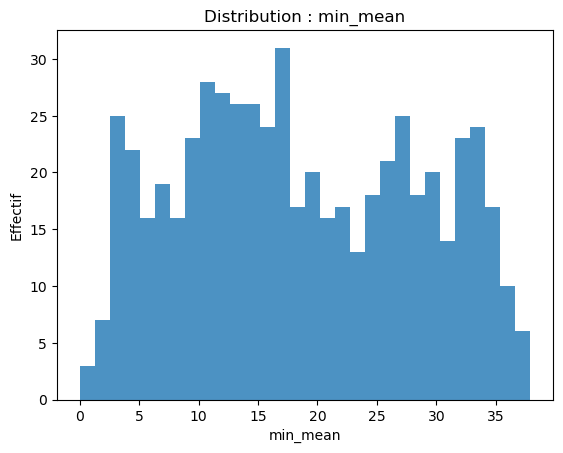

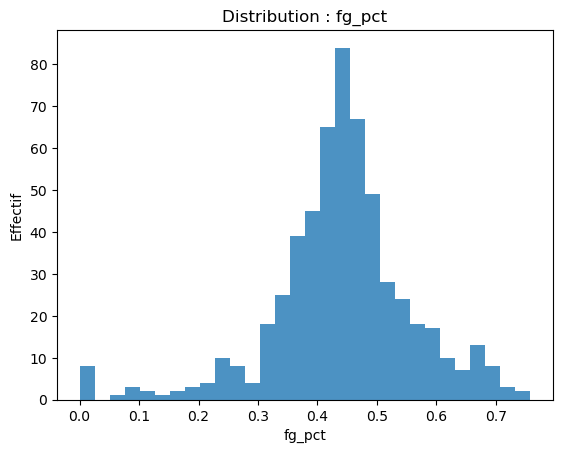

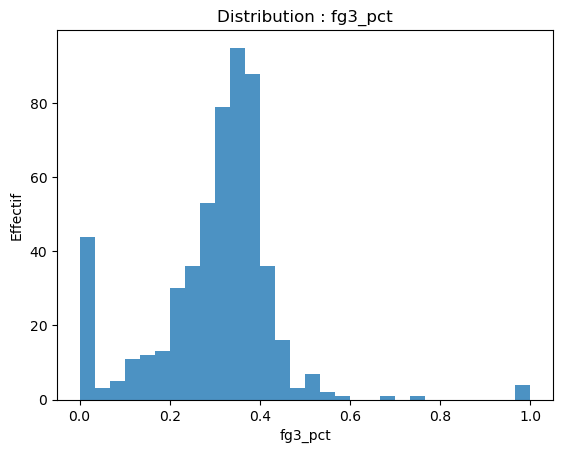

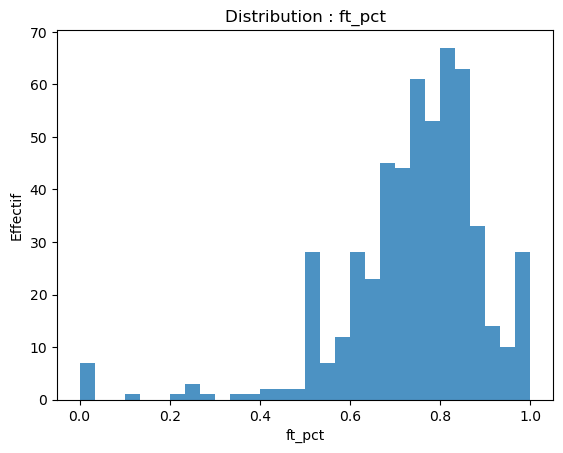

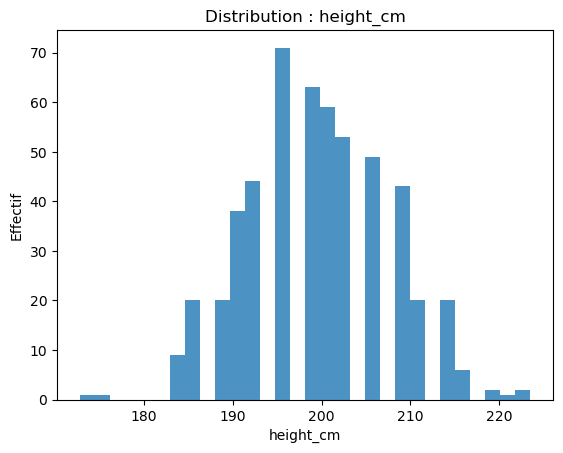

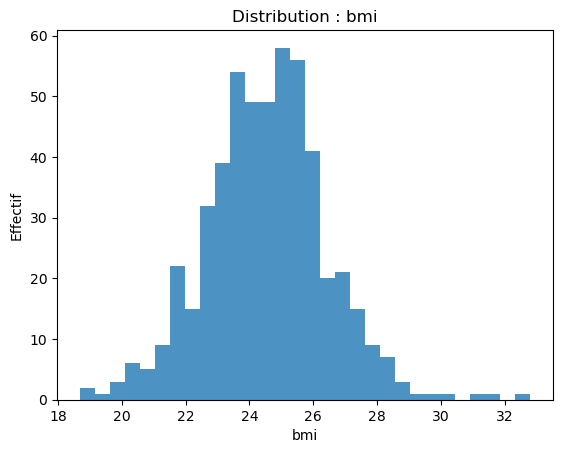

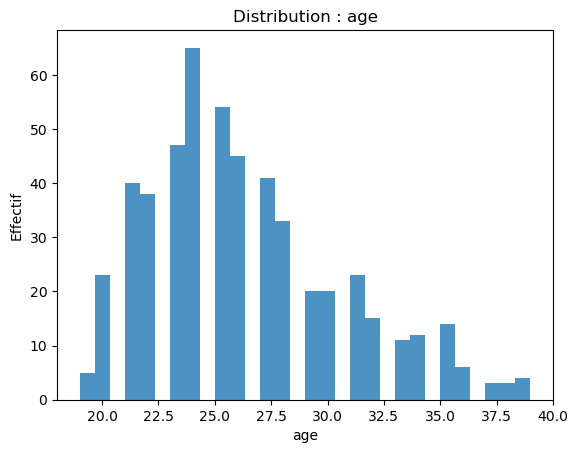

In [14]:
features = ['pts_mean','reb_mean','ast_mean','pm_mean','min_mean','fg_pct','fg3_pct','ft_pct','height_cm','bmi','age']
for col in features:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30, alpha=0.8)
    plt.title(f'Distribution : {col}')
    plt.xlabel(col); plt.ylabel('Effectif')
    plt.show()

## Matrice de corrélations

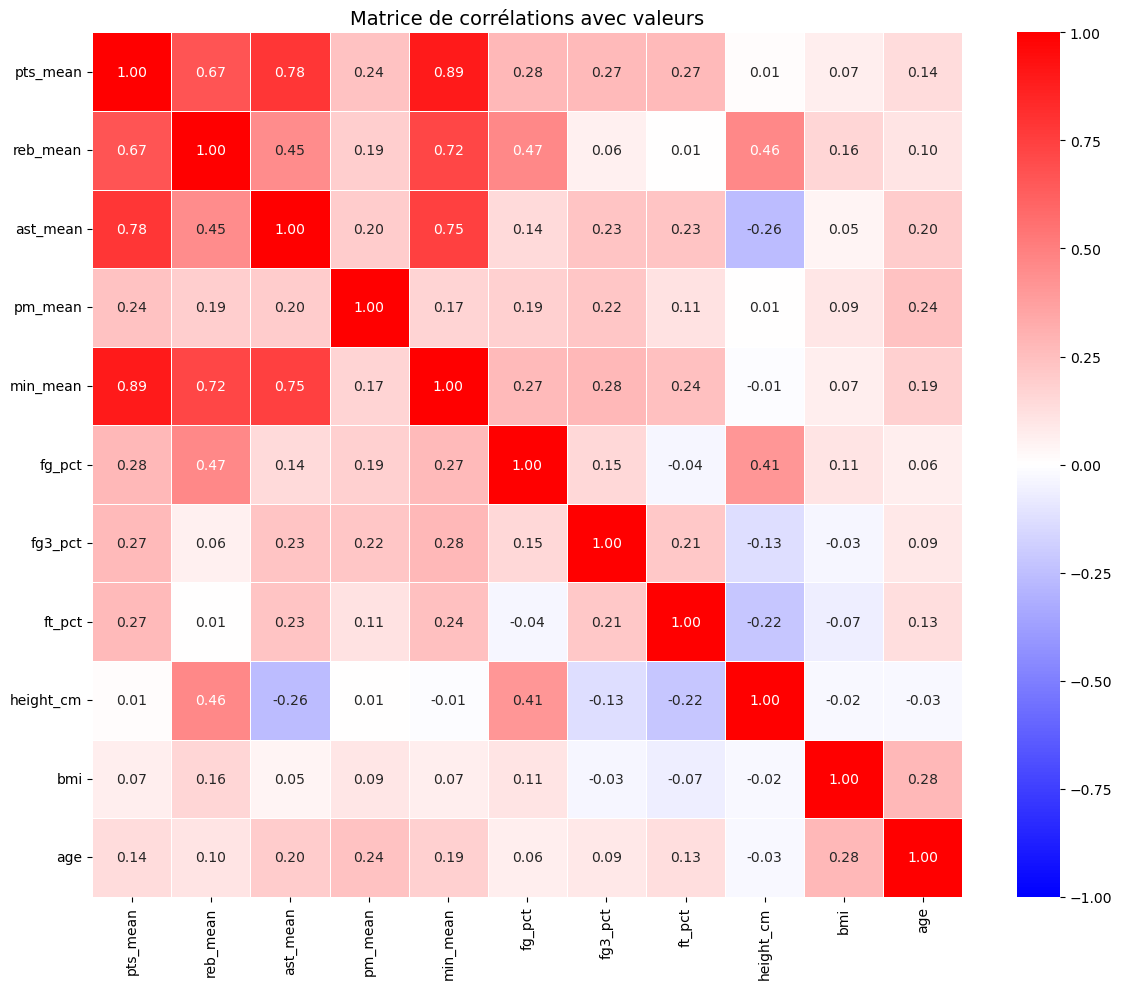

In [21]:
num_cols = ['pts_mean','reb_mean','ast_mean','pm_mean','min_mean','fg_pct','fg3_pct','ft_pct','height_cm','bmi','age']
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))  # Taille augmentée pour meilleure lisibilité
sns.heatmap(corr, vmin=-1, vmax=1, cmap='bwr', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélations avec valeurs', fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
# Afficher toutes les colonnes disponibles dans le fichier gamelog
import duckdb

con = duckdb.connect()
# Liste complète des colonnes dans le fichier brut
cols_info = con.execute("DESCRIBE SELECT * FROM 'nba_rating/data/raw/player_gamelog_2023-24.parquet'").df()
print(f"Nombre total de colonnes dans gamelog: {len(cols_info)}")
cols_info

Nombre total de colonnes dans gamelog: 32


,column_name,column_type,null,key,default,extra
0,SEASON_ID,VARCHAR,YES,None,None,None
1,PLAYER_ID,BIGINT,YES,None,None,None
2,PLAYER_NAME,VARCHAR,YES,None,None,None
3,TEAM_ID,BIGINT,YES,None,None,None
4,TEAM_ABBREVIATION,VARCHAR,YES,None,None,None
5,TEAM_NAME,VARCHAR,YES,None,None,None
6,GAME_ID,VARCHAR,YES,None,None,None
7,GAME_DATE,VARCHAR,YES,None,None,None
8,MATCHUP,VARCHAR,YES,None,None,None
9,WL,VARCHAR,YES,None,None,None


In [24]:
# Identifier les colonnes les plus corrélées avec la performance
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
import pandas as pd

# Extraire toutes les colonnes numériques du jeu de données complet
all_numeric_cols = gamelog.select_dtypes(include=['number']).columns.tolist()
all_stats_per_player = gamelog.groupby('PLAYER_ID')[all_numeric_cols].mean()

# Pour chaque métrique d'intérêt (par exemple, +/-)
target = all_stats_per_player['PLUS_MINUS']
features = all_stats_per_player.drop('PLUS_MINUS', axis=1)

# Gérer les valeurs manquantes avec SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(
    imputer.fit_transform(features),
    columns=features.columns,
    index=features.index
)

# Sélectionner les k meilleures features
selector = SelectKBest(f_regression, k=15)
selector.fit(features_imputed, target)
top_features_idx = selector.get_support(indices=True)
top_features = features.columns[top_features_idx]

print("Variables les plus prédictives du plus-minus:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}")

Variables les plus prédictives du plus-minus:
1. PLAYER_ID
2. MIN
3. FGM
4. FGA
5. FG_PCT
6. FG3M
7. FG3_PCT
8. FTM
9. FTA
10. DREB
11. REB
12. AST
13. STL
14. PTS
15. FANTASY_PTS


In [26]:
# Utiliser PCA pour identifier les dimensions principales de variation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Gérer les valeurs manquantes dans all_stats_per_player
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(all_stats_per_player)

# Normaliser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Appliquer PCA
pca = PCA(n_components=0.95)  # Conserver 95% de la variance
pca.fit(scaled_data)

print(f"Nombre de composantes pour capturer 95% de la variance: {pca.n_components_}")
print("Variance expliquée par composante:", pca.explained_variance_ratio_)

# Analyser les poids des variables dans les composantes principales
for i, component in enumerate(pca.components_[:3]):
    print(f"\nComposante {i+1} - Variables importantes:")
    # Afficher les 5 variables avec les coefficients les plus élevés (en valeur absolue)
    indices = np.abs(component).argsort()[::-1][:5]
    for idx in indices:
        print(f"  {all_stats_per_player.columns[idx]}: {component[idx]:.3f}")

Nombre de composantes pour capturer 95% de la variance: 11
Variance expliquée par composante: [0.51788321 0.12711136 0.06554808 0.04805367 0.04038336 0.03603109
 0.03308833 0.02608421 0.02449189 0.02139182 0.01655813]

Composante 1 - Variables importantes:
  FANTASY_PTS: 0.288
  PTS: 0.281
  FGM: 0.280
  FGA: 0.275
  MIN: 0.273

Composante 2 - Variables importantes:
  OREB: 0.458
  FG3A: -0.354
  FG3M: -0.350
  BLK: 0.346
  REB: 0.322

Composante 3 - Variables importantes:
  PLUS_MINUS: 0.648
  TEAM_ID: -0.615
  PLAYER_ID: -0.289
  FG3_PCT: 0.214
  FG_PCT: 0.178


/Users/Othmane/anaconda3/lib/python3.11/site-packages/numpy/lib/_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/Users/Othmane/anaconda3/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


SVD did not converge for usg_pct vs pm_mean
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value


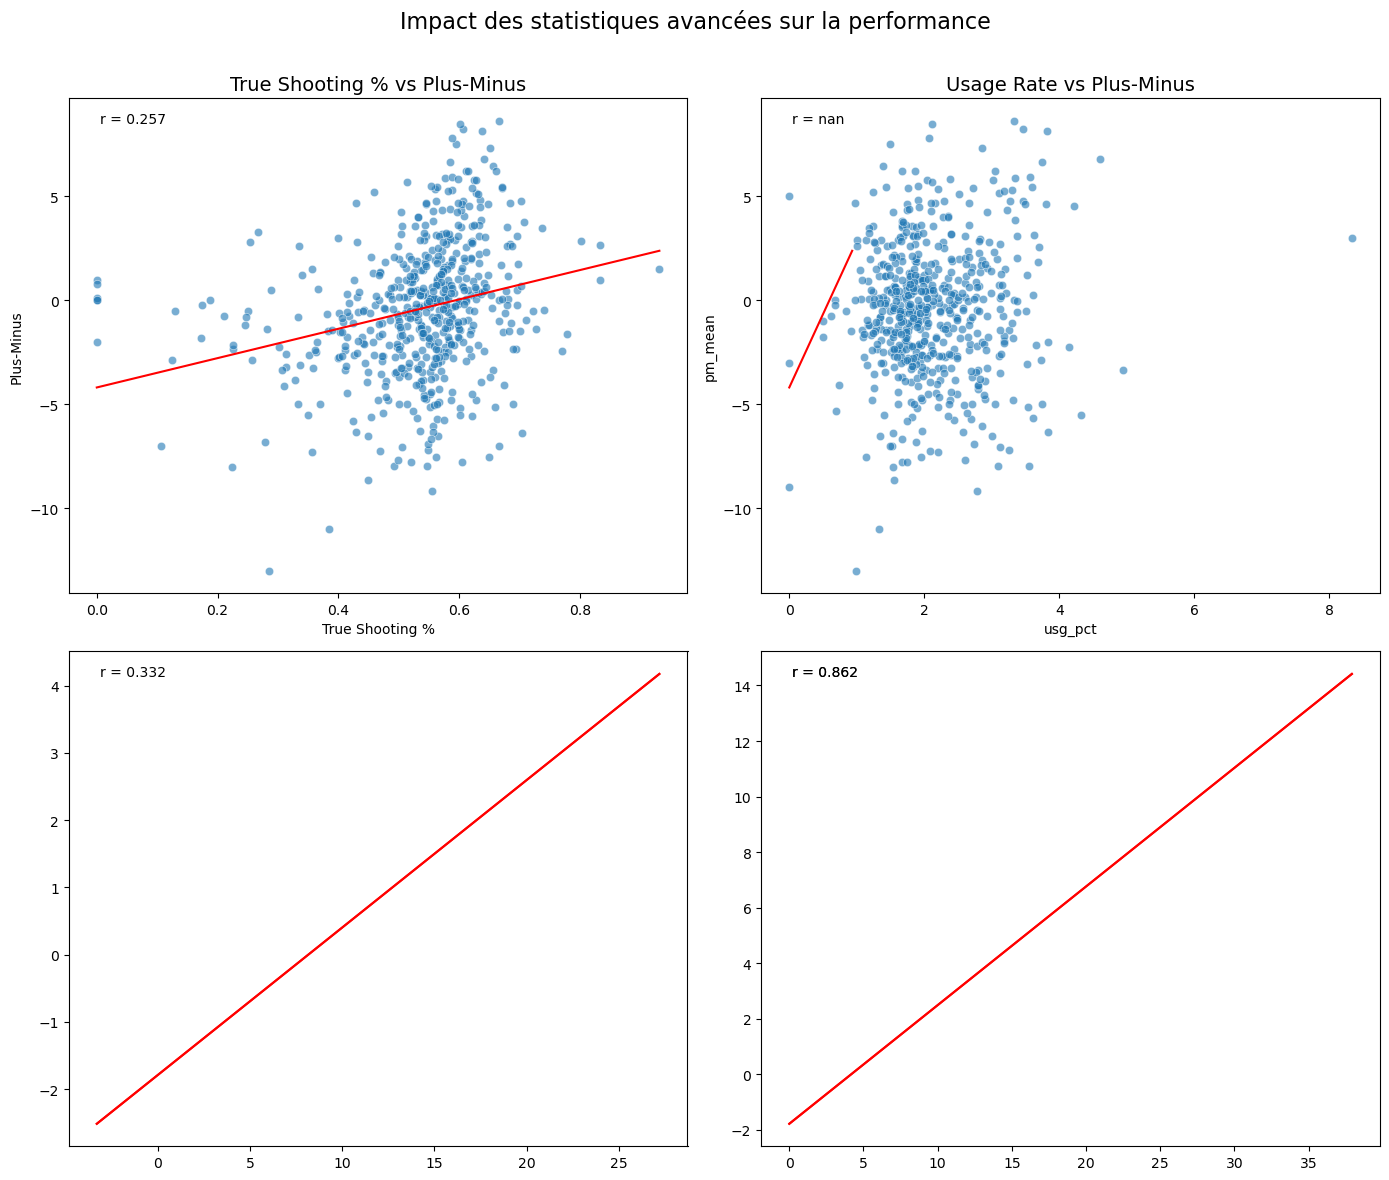

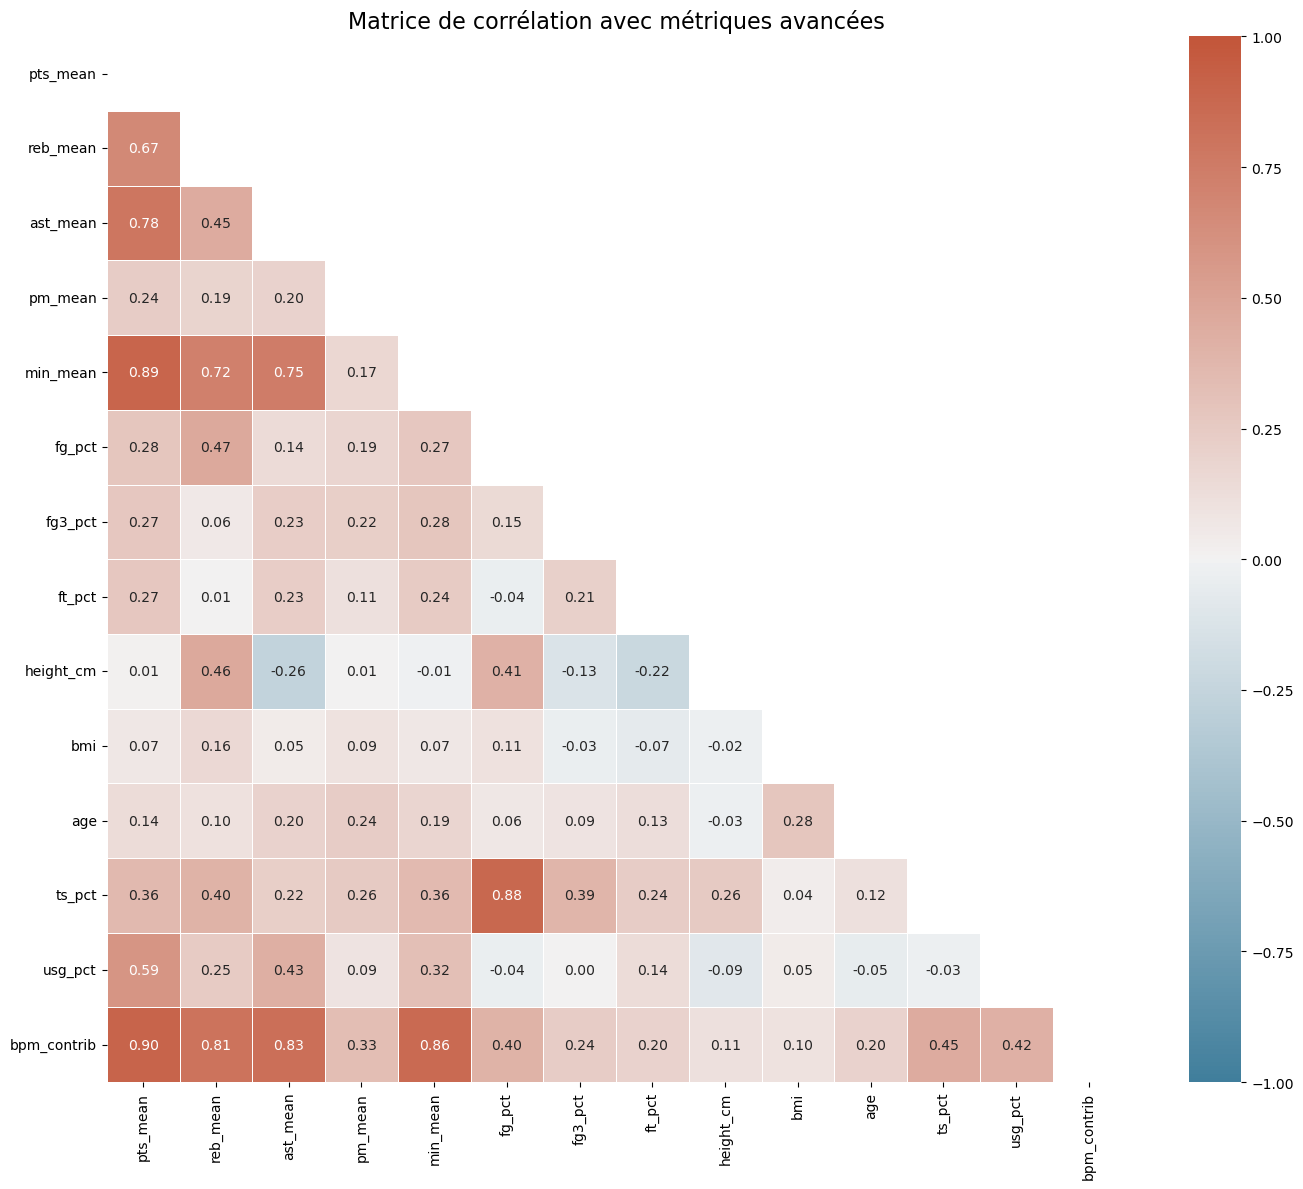

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Create advanced metrics
# Create a new dataframe with advanced stats to complement existing ones
advanced_stats = gamelog.copy()

# Calculate True Shooting Percentage (TS%)
advanced_stats['TS_PCT'] = advanced_stats['PTS'] / (2 * (advanced_stats['FGA'] + 0.44 * advanced_stats['FTA']))

# Calculate Usage Rate (approximate formula)
advanced_stats['USG_PCT'] = ((advanced_stats['FGA'] + 0.44 * advanced_stats['FTA'] + advanced_stats['TOV']) / 
                             (advanced_stats['MIN'] / 5))

# Calculate simple box plus-minus contribution
advanced_stats['BPM_CONTRIB'] = (advanced_stats['PTS'] - advanced_stats['FGA']) + \
                                (advanced_stats['REB'] * 0.7) + \
                                (advanced_stats['AST'] * 1.3) + \
                                (advanced_stats['STL'] * 1.7) + \
                                (advanced_stats['BLK'] * 1.0) - \
                                (advanced_stats['TOV'] * 1.2) - \
                                (advanced_stats['PF'] * 0.5)

# Aggregate by player
adv_per_player = (advanced_stats
                  .groupby('PLAYER_ID')
                  .agg(ts_pct=('TS_PCT', 'mean'),
                       usg_pct=('USG_PCT', 'mean'),
                       bpm_contrib=('BPM_CONTRIB', 'mean'))
                  .reset_index())

# Merge with our existing player dataframe
df_adv = df.merge(adv_per_player, on='PLAYER_ID', how='left')

# Visualize the relationship between these advanced stats and player performance

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 1. True Shooting % vs Plus-Minus
sns.scatterplot(data=df_adv, x='ts_pct', y='pm_mean', ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title('True Shooting % vs Plus-Minus', fontsize=14)
axes[0, 0].set_xlabel('True Shooting %')
axes[0, 0].set_ylabel('Plus-Minus')

# Add trend line
mask = ~(df_adv['ts_pct'].isna() | df_adv['pm_mean'].isna())
if mask.any():
    try:
        m, b = np.polyfit(df_adv.loc[mask, 'ts_pct'], df_adv.loc[mask, 'pm_mean'], 1)
        x_range = np.linspace(df_adv.loc[mask, 'ts_pct'].min(), df_adv.loc[mask, 'ts_pct'].max(), 100)
        axes[0, 0].plot(x_range, m * x_range + b, color='red')
        r = np.corrcoef(df_adv.loc[mask, 'ts_pct'], df_adv.loc[mask, 'pm_mean'])[0, 1]
        axes[0, 0].text(0.05, 0.95, f'r = {r:.3f}', transform=axes[0, 0].transAxes)
    except np.linalg.LinAlgError:
        print("SVD did not converge for ts_pct vs pm_mean")

# 2. Usage Rate vs Plus-Minus
sns.scatterplot(data=df_adv, x='usg_pct', y='pm_mean', ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Usage Rate vs Plus-Minus', fontsize=14)
# Add trend line
mask = ~(df_adv['usg_pct'].isna() | df_adv['pm_mean'].isna())
if mask.any():
    try:
        m, b = np.polyfit(df_adv.loc[mask, 'usg_pct'], df_adv.loc[mask, 'pm_mean'], 1)
        x_range = np.linspace(df_adv.loc[mask, 'usg_pct'].min(), df_adv.loc[mask, 'usg_pct'].max(), 100)
        axes[0, 1].plot(x_range, m * x_range + b, color='red')
        r = np.corrcoef(df_adv.loc[mask, 'usg_pct'], df_adv.loc[mask, 'pm_mean'])[0, 1]
        axes[0, 1].text(0.05, 0.95, f'r = {r:.3f}', transform=axes[0, 1].transAxes)
    except np.linalg.LinAlgError:
        print("SVD did not converge for usg_pct vs pm_mean")
    axes[0, 1].plot(x_range, m * x_range + b, color='red')
    r = np.corrcoef(df_adv.loc[mask, 'usg_pct'], df_adv.loc[mask, 'pm_mean'])[0, 1]
    axes[0, 1].text(0.05, 0.95, f'r = {r:.3f}', transform=axes[0, 1].transAxes)

# Add trend line
mask = ~(df_adv['bpm_contrib'].isna() | df_adv['pm_mean'].isna())
if mask.any():
    try:
        m, b = np.polyfit(df_adv.loc[mask, 'bpm_contrib'], df_adv.loc[mask, 'pm_mean'], 1)
        x_range = np.linspace(df_adv.loc[mask, 'bpm_contrib'].min(), df_adv.loc[mask, 'bpm_contrib'].max(), 100)
        axes[1, 0].plot(x_range, m * x_range + b, color='red')
        r = np.corrcoef(df_adv.loc[mask, 'bpm_contrib'], df_adv.loc[mask, 'pm_mean'])[0, 1]
        axes[1, 0].text(0.05, 0.95, f'r = {r:.3f}', transform=axes[1, 0].transAxes)
    except np.linalg.LinAlgError:
        print("SVD did not converge for bpm_contrib vs pm_mean")
if mask.any():
    m, b = np.polyfit(df_adv.loc[mask, 'bpm_contrib'], df_adv.loc[mask, 'pm_mean'], 1)
    x_range = np.linspace(df_adv['bpm_contrib'].min(), df_adv['bpm_contrib'].max(), 100)
    axes[1, 0].plot(x_range, m * x_range + b, color='red')
# Add trend line
mask = ~(df_adv['min_mean'].isna() | df_adv['bpm_contrib'].isna())
if mask.any():
    try:
        m, b = np.polyfit(df_adv.loc[mask, 'min_mean'], df_adv.loc[mask, 'bpm_contrib'], 1)
        x_range = np.linspace(df_adv.loc[mask, 'min_mean'].min(), df_adv.loc[mask, 'min_mean'].max(), 100)
        axes[1, 1].plot(x_range, m * x_range + b, color='red')
        r = np.corrcoef(df_adv.loc[mask, 'min_mean'], df_adv.loc[mask, 'bpm_contrib'])[0, 1]
        axes[1, 1].text(0.05, 0.95, f'r = {r:.3f}', transform=axes[1, 1].transAxes)
    except np.linalg.LinAlgError:
        print("SVD did not converge for min_mean vs bpm_contrib")

# Add trend line
mask = ~(df_adv['min_mean'].isna() | df_adv['bpm_contrib'].isna())
if mask.any():
    m, b = np.polyfit(df_adv.loc[mask, 'min_mean'], df_adv.loc[mask, 'bpm_contrib'], 1)
    x_range = np.linspace(df_adv['min_mean'].min(), df_adv['min_mean'].max(), 100)
    axes[1, 1].plot(x_range, m * x_range + b, color='red')
    r = np.corrcoef(df_adv.loc[mask, 'min_mean'], df_adv.loc[mask, 'bpm_contrib'])[0, 1]
    axes[1, 1].text(0.05, 0.95, f'r = {r:.3f}', transform=axes[1, 1].transAxes)

plt.suptitle('Impact des statistiques avancées sur la performance', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Create a correlation matrix with all variables including new ones
new_num_cols = num_cols + ['ts_pct', 'usg_pct', 'bpm_contrib']
new_corr = df_adv[new_num_cols].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(new_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(new_corr, mask=mask, cmap=cmap, annot=True, fmt='.2f', 
            center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice de corrélation avec métriques avancées', fontsize=16)
plt.tight_layout()
plt.show()

In [30]:
# Tests d'ablation : supprimer chaque variable et mesurer l'impact sur la note finale
from scipy.stats import pearsonr
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sélectionner les principales variables à utiliser pour la notation
to_z = ['pts_mean', 'reb_mean', 'ast_mean', 'pm_mean', 'min_mean', 'ts_pct', 'bpm_contrib']

# Standardiser les variables (Z-score)
scaler = StandardScaler()
df_z = pd.DataFrame(
    scaler.fit_transform(df_adv[to_z].fillna(df_adv[to_z].mean())),
    columns=to_z,
    index=df_adv.index
)

# Calculer la note originale (combinaison linéaire simple)
weights = {
    'pts_mean': 0.25,
    'reb_mean': 0.15, 
    'ast_mean': 0.15,
    'pm_mean': 0.20,
    'min_mean': 0.10,
    'ts_pct': 0.10,
    'bpm_contrib': 0.05
}

# Calculer la note originale
df_adv['note'] = sum(df_z[var] * weight for var, weight in weights.items())

# Pour chaque variable dans to_z, calculer la note sans cette variable
results = []
for var_to_remove in to_z:
    # Recalculer les poids en redistribuant le poids de la variable supprimée
    remaining_vars = [v for v in to_z if v != var_to_remove]
    removed_weight = weights[var_to_remove]
    
    # Redistribuer proportionnellement le poids aux variables restantes
    remaining_weights = {v: weights[v] for v in remaining_vars}
    weight_sum = sum(remaining_weights.values())
    
    # Ajuster les poids pour qu'ils somment à 1
    adjusted_weights = {v: (w/weight_sum) for v, w in remaining_weights.items()}
    
    # Calculer la nouvelle note sans cette variable
    df_adv['new_note'] = sum(df_z[var] * adjusted_weights.get(var, 0) for var in remaining_vars)
    
    # Calculer la corrélation entre la note originale et la nouvelle
    valid_mask = ~(df_adv['note'].isna() | df_adv['new_note'].isna())
    if valid_mask.sum() > 1:  # Besoin d'au moins 2 points valides pour la corrélation
        corr, _ = pearsonr(df_adv.loc[valid_mask, 'note'], df_adv.loc[valid_mask, 'new_note'])
        results.append((var_to_remove, corr))

# Afficher les résultats triés par impact (faible corrélation = variable importante)
results_df = pd.DataFrame(results, columns=["Variable omise", "Corrélation avec note originale"])
results_df['Importance relative'] = 1 - results_df['Corrélation avec note originale']
results_df.sort_values("Corrélation avec note originale")

,Variable omise,Corrélation avec note originale,Importance relative
3,pm_mean,0.966350,0.033650
0,pts_mean,0.981653,0.018347
1,reb_mean,0.988653,0.011347
2,ast_mean,0.989522,0.010478
5,ts_pct,0.992612,0.007388
4,min_mean,0.997319,0.002681
6,bpm_contrib,0.999794,0.000206


## Scatter plots

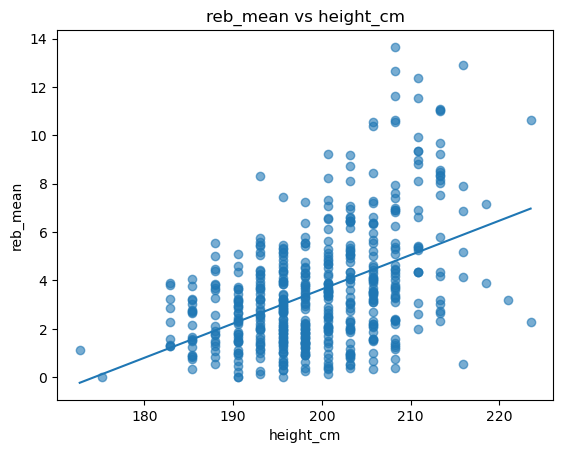

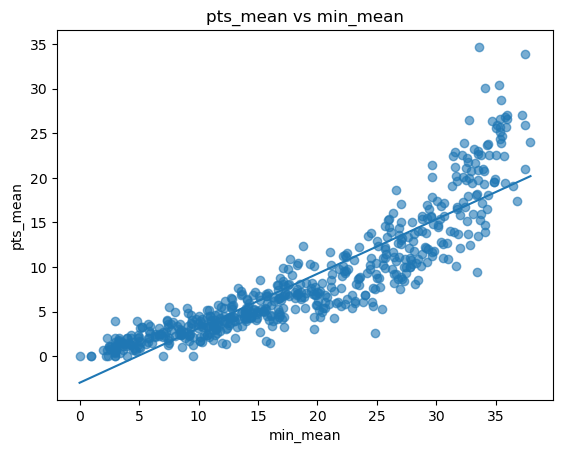

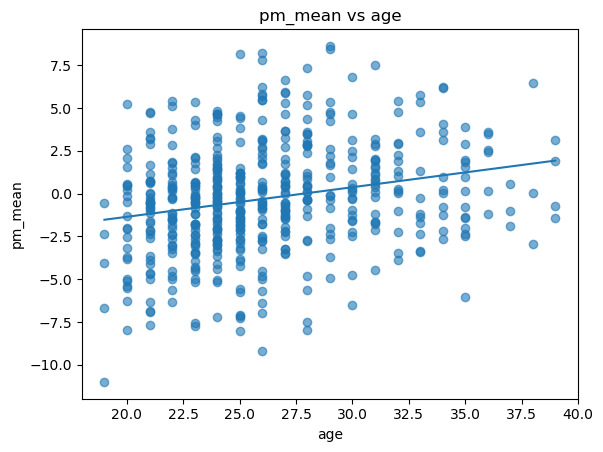

In [16]:
pairs = [('height_cm','reb_mean'), ('min_mean','pts_mean'), ('age','pm_mean')]
for x,y in pairs:
    plt.figure()
    plt.scatter(df[x], df[y], alpha=0.6)
    # Filter out NaN values from both x and y for polyfit
    mask = ~(df[x].isna() | df[y].isna())
    m,b = np.polyfit(df[x][mask], df[y][mask], 1)
    xx = np.linspace(df[x].min(), df[x].max(), 100); plt.plot(xx, m*xx+b)
    plt.xlabel(x); plt.ylabel(y); plt.title(f'{y} vs {x}')
    plt.show()

## Boxplots par poste

/var/folders/_f/2srlysd96rvbypcnm9b8564w0000gn/T/ipykernel_6486/3235592446.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=['G','F','C'])


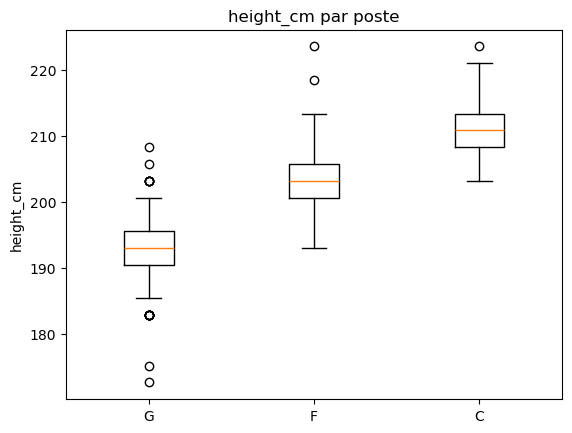

/var/folders/_f/2srlysd96rvbypcnm9b8564w0000gn/T/ipykernel_6486/3235592446.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=['G','F','C'])


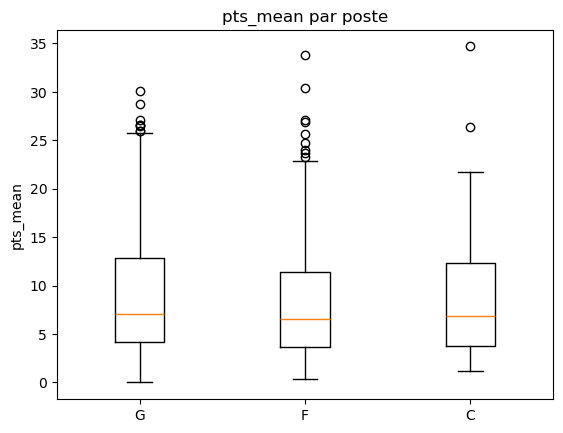

/var/folders/_f/2srlysd96rvbypcnm9b8564w0000gn/T/ipykernel_6486/3235592446.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=['G','F','C'])


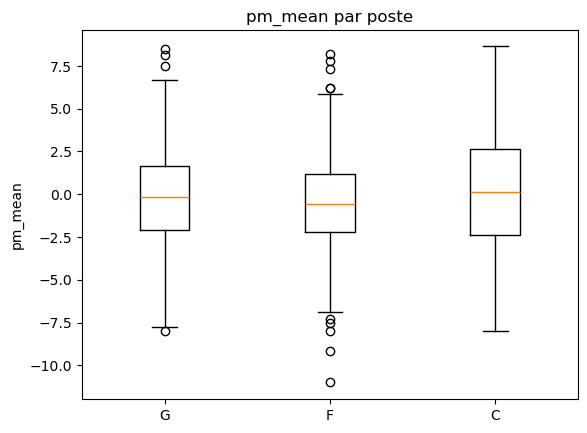

In [17]:
if 'POSITION' in df.columns:
    df['pos']=df['POSITION'].str[0]
    for col in ['height_cm','pts_mean','pm_mean']:
        plt.figure()
        groups=[df[df.pos==p][col].dropna() for p in ['G','F','C']]
        plt.boxplot(groups, labels=['G','F','C'])
        plt.title(f'{col} par poste'); plt.ylabel(col); plt.show()

## Conclusion : variables candidates
Sélectionner parmi `pts_mean, reb_mean, ast_mean, pm_mean, fg_pct, fg3_pct, ft_pct, gp, min_mean, height_cm, bmi, age`